# Question 1

- Step 1. Import the necessary libraries
- Step 2. Import the dataset 
- Step 3. Assign it to a variable called users

In [1]:
import pandas as pd
users = pd.read_csv("/users/mausam/downloads/users.csv", delimiter="|")
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


- Step 4. Discover what is the mean age per occupation

In [2]:
mean = users.groupby(['occupation']).mean() 
print(mean)

                  user_id        age
occupation                          
administrator  430.949367  38.746835
artist         451.892857  31.392857
doctor         533.714286  43.571429
educator       466.905263  42.010526
engineer       456.328358  36.388060
entertainment  398.000000  29.222222
executive      422.312500  38.718750
healthcare     501.437500  41.562500
homemaker      443.000000  32.571429
lawyer         359.083333  36.750000
librarian      486.588235  40.000000
marketing      437.807692  37.615385
none           368.666667  26.555556
other          542.733333  34.523810
programmer     435.530303  33.121212
retired        515.714286  63.071429
salesman       494.916667  35.666667
scientist      465.129032  35.548387
student        484.954082  22.081633
technician     497.629630  33.148148
writer         495.711111  36.311111


- Step 5. Discover the Male ratio per occupation and sort it from the most to the least

In [3]:
ratio = (users.groupby('occupation').gender.count()).sort_values(ascending = False)
print(ratio)

occupation
student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
lawyer            12
salesman          12
none               9
homemaker          7
doctor             7
Name: gender, dtype: int64


- Step 6. For each occupation, calculate the minimum and maximum ages

In [4]:
age = users.groupby(['occupation']).age.agg(['min', 'max'])
print(age)

               min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60


- Step 7. For each combination of occupation and sex, calculate the mean age

In [5]:
mean_age = users.groupby(['occupation','gender']).age.mean()
print(mean_age)

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

- Step 8. For each occupation present the percentage of women and men
- Reference : https://stackoverflow.com/

In [6]:
gender = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})

occupation = users.groupby(['occupation']).count()


occupation_gender = gender.div(occupation, level = "occupation")
occupation_gender.loc[:, 'gender']


occupation     gender
administrator  F         0.455696
               M         0.544304
artist         F         0.464286
               M         0.535714
doctor         M         1.000000
educator       F         0.273684
               M         0.726316
engineer       F         0.029851
               M         0.970149
entertainment  F         0.111111
               M         0.888889
executive      F         0.093750
               M         0.906250
healthcare     F         0.687500
               M         0.312500
homemaker      F         0.857143
               M         0.142857
lawyer         F         0.166667
               M         0.833333
librarian      F         0.568627
               M         0.431373
marketing      F         0.384615
               M         0.615385
none           F         0.444444
               M         0.555556
other          F         0.342857
               M         0.657143
programmer     F         0.090909
               M         0

# question 2

- Step 1. Import the necessary libraries
- Step 2. Import the dataset 
- Step 3. Assign it to a variable called euro12

In [7]:
import pandas as pd
euro12 = pd.read_csv("/users/mausam/downloads/euro.csv", delimiter=",")
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


- Step 4. Select only the Goal column

In [8]:
goals = euro12.Goals 
print(goals)

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64


- Step 5. How many team participated in the Euro2012?

In [9]:
team = euro12.Team.count() 
print(team)

16


- Step 6. What is the number of columns in the dataset?

In [10]:
print(len(euro12.columns))


35


- Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [11]:
discipline = euro12[['Team','Yellow Cards','Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


- Step 8. Sort the teams by Red Cards, then to Yellow Cards

In [12]:
discipline.sort_values(by=['Red Cards','Yellow Cards'])
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


- Step 9. Calculate the mean Yellow Cards given per Team

In [13]:
discipline['Yellow Cards'].mean()

7.4375

- Step 10. Filter teams that scored more than 6 goals

In [14]:
more_goals = euro12[euro12['Goals']>6]
more_goals

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


- Step 11. Select the teams that start with G

In [15]:
team_g = euro12[euro12.Team.str.startswith("G")]
team_g

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


- Step 12. Select the first 7 columns

In [16]:
first = euro12.iloc[:, :7]             
first

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


- Step 13. Select all columns except the last 3

In [17]:
last = euro12.iloc[:, :-3]             
last

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


- Step 14. Present only the Shooting Accuracy from England, Italy and Russia
- References : https://jovian.ai/petraschroter/

In [18]:
euro12.loc[euro12.Team.isin(['England', 'Italy', 'Russia']), ['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3

- Step 1. Import the necessary libraries
- Step 2. Create 3 differents Series, each of length 100, as follows:
 - The first a random number from 1 to 4
 - The second a random number from 1 to 3
 - The third a random number from 10,000 to 30,000
- Step 3. Create a DataFrame by joinning the Series by column
- Reference : https://leechamin.tistory.com/

In [19]:
import pandas as pd
import numpy as np
import random

num1 = pd.Series(np.random.randint(1,5,100))
num2 = pd.Series(np.random.randint(1,4,100))
num3 = pd.Series(np.random.randint(10000,30000,100))

series = pd.concat([num1,num2,num3],axis=1)
series.head()


,0,1,2
0,2,2,26134
1,2,1,22138
2,2,2,27817
3,1,1,16784
4,1,3,10475


- Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [20]:
series.columns = ['bedrs','bathrs','price_sqr_meter']
series.head()

,bedrs,bathrs,price_sqr_meter
0,2,2,26134
1,2,1,22138
2,2,2,27817
3,1,1,16784
4,1,3,10475


- Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'


In [21]:
bigcolumn = pd.concat([num1,num2,num3],axis=0)
bigcolumn

0         2
1         2
2         2
3         1
4         1
      ...  
95    16017
96    23602
97    21437
98    13203
99    21180
Length: 300, dtype: int64

- Step 6. Ops it seems it is going only until index 99. Is it true?
- No the index length is 300 which is proved by following code

In [22]:
len(bigcolumn)

300

- Step 7. Reindex the DataFrame so it goes from 0 to 299

In [23]:
bigcolumn.reset_index(drop=True, inplace=True)
bigcolumn

0          2
1          2
2          2
3          1
4          1
       ...  
295    16017
296    23602
297    21437
298    13203
299    21180
Length: 300, dtype: int64

# Question 4

- Step 1. Import the necessary libraries
- Step 2. Import the dataset from the attached file wind.txt
- Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

In [118]:
import pandas as pd
import datetime

data = pd.read_csv("/users/mausam/downloads/wind.txt", sep = "\s+", parse_dates = [[0,1,2]]) 
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


- Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it

In [119]:
def fix(x):
  year = x.year - 100 if x.year > 2022 else x.year
  return datetime.date(year, x.month, x.day)

data['Yr_Mo_Dy'] = data['Yr_Mo_Dy'].apply(fix)

data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


- Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [120]:
new = data.set_index("Yr_Mo_Dy")
new.index.astype("datetime64[ns]")
new.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


- Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.

In [121]:
new.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

- Step 7. Compute how many non-missing values there are in total

In [122]:
new.notnull().sum()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

- Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
A single number for the entire dataset

In [123]:
entire_mean = new.mean()
entire_mean.mean()

10.227982360836924

- Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days

In [124]:
loc_stats = data.describe(percentiles=[])
loc_stats.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6568.000000,6571.000000,6572.000000,6569.000000,6572.000000,6574.000000,6571.000000,6572.000000,6571.000000,6573.000000,6574.000000,6570.000000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
50%,11.710000,10.170000,10.920000,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.290000,12.500000,15.000000


- Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.
A different set of numbers for each day.

In [125]:
day_stats = pd.DataFrame()

day_stats['min'] = data.min(axis = 1) 
day_stats['max'] = data.max(axis = 1) 
day_stats['mean'] = data.mean(axis = 1)
day_stats['std'] = data.std(axis = 1) 

day_stats.head()

/var/folders/1y/86xyrvln2hq31n0yxykk2wwh0000gn/T/ipykernel_26294/1751669197.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  day_stats['min'] = data.min(axis = 1)
/var/folders/1y/86xyrvln2hq31n0yxykk2wwh0000gn/T/ipykernel_26294/1751669197.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  day_stats['max'] = data.max(axis = 1)
/var/folders/1y/86xyrvln2hq31n0yxykk2wwh0000gn/T/ipykernel_26294/1751669197.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  day_stats['mean'] = data.mean(

,min,max,mean,std
0,9.29,18.50,13.018182,2.808875
1,6.50,17.54,11.336364,3.188994
2,6.17,18.50,11.641818,3.681912
3,1.79,11.75,6.619167,3.198126
4,6.17,13.33,10.630000,2.445356


- Step 11. Find the average windspeed in January for each location.
Treat January 1961 and January 1962 both as January.

In [128]:
data.index = pd.to_datetime(data.index)
data.loc[data.index.month == 1].mean()

/var/folders/1y/86xyrvln2hq31n0yxykk2wwh0000gn/T/ipykernel_26294/1864170225.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.loc[data.index.month == 1].mean()


RPT    12.362987
VAL    10.644314
ROS    11.660526
KIL     6.306468
SHA    10.455834
BIR     7.092254
DUB     9.797343
CLA     8.495053
MUL     8.493590
CLO     8.707332
BEL    13.121007
MAL    15.599079
dtype: float64

- Step 12. Downsample the record to a yearly frequency for each location.

In [129]:

print( data.resample('A').mean())


                  RPT        VAL        ROS       KIL        SHA       BIR  \
1970-12-31  12.362987  10.644314  11.660526  6.306468  10.455834  7.092254   

                 DUB       CLA      MUL       CLO        BEL        MAL  
1970-12-31  9.797343  8.495053  8.49359  8.707332  13.121007  15.599079  


- Step 13. Downsample the record to a monthly frequency for each location.

In [130]:
print ( data.resample('M').mean())

                  RPT        VAL        ROS       KIL        SHA       BIR  \
1970-01-31  12.362987  10.644314  11.660526  6.306468  10.455834  7.092254   

                 DUB       CLA      MUL       CLO        BEL        MAL  
1970-01-31  9.797343  8.495053  8.49359  8.707332  13.121007  15.599079  


- Step 14. Downsample the record to a weekly frequency for each location.

In [131]:
print (data.resample('W').mean())

                  RPT        VAL        ROS       KIL        SHA       BIR  \
1970-01-04  12.362987  10.644314  11.660526  6.306468  10.455834  7.092254   

                 DUB       CLA      MUL       CLO        BEL        MAL  
1970-01-04  9.797343  8.495053  8.49359  8.707332  13.121007  15.599079  


- Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [132]:
first = data[data.index.year == 1961]
week = data.resample('W').mean().apply(lambda x: x.describe())
week.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.49359,8.707332,13.121007,15.599079
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.49359,8.707332,13.121007,15.599079
25%,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.49359,8.707332,13.121007,15.599079


# Question 5

- Step 1. Import the necessary libraries
- Step 2. Import the dataset from this address.
- Step 3. Assign it to a variable called chipo.

In [133]:
import pandas as pd
chipo = pd.read_csv("/users/mausam/downloads/chipo.csv", delimiter= "\t")
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


- Step 4. See the first 10 entries

In [134]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


- Step 5. What is the number of observations in the dataset?

In [135]:
len(chipo)

4622

- Step 6. What is the number of columns in the dataset?

In [136]:
len(chipo.columns)

5

- Step 7. Print the name of all the columns.

In [137]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

- Step 8. How is the dataset indexed?

In [138]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

- Step 9. Which was the most-ordered item?

In [139]:
chipo.groupby(by="item_name").sum().sort_values('quantity',ascending=False).head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


- Step 10. For the most-ordered item, how many items were ordered?

In [140]:
chipo.groupby(by='item_name').quantity.sum().sort_values(ascending = False).head(1)

item_name
Chicken Bowl    761
Name: quantity, dtype: int64

- Step 11. What was the most ordered item in the choice_description column?

In [141]:
chipo.groupby('choice_description').sum().sort_values(['quantity'], ascending=False).head(1)


,order_id,quantity
choice_description,,
[Diet Coke],123455,159


- Step 12. How many items were orderd in total?

In [142]:
chipo.quantity.sum()

4972

- Step 13.
 - Turn the item price into a float
 - Check the item price type
 - Create a lambda function and change the type of item price
 - Check the item price type

In [143]:
chipo.item_price.dtype

dtype('O')

In [144]:
chipo.item_price = chipo.item_price.apply(lambda x: float(x[1:]))

In [145]:
chipo.item_price.dtype

dtype('float64')

- Step 14. How much was the revenue for the period in the dataset?

In [146]:
revenue =  (chipo.item_price * chipo.quantity).sum()
revenue

39237.02

- Step 15. How many orders were made in the period?

In [147]:
chipo.order_id.value_counts().count()

1834

- Step 16. What is the average revenue amount per order?

In [148]:
chipo.groupby(by=['order_id']).sum().mean()['item_price']



18.81142857142869

- Step 17. How many different items are sold?


In [149]:
chipo['item_name'].nunique()

50

# Question 6

- Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!

<Figure size 432x288 with 0 Axes>

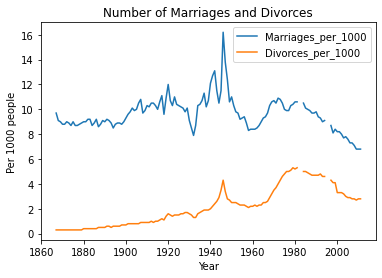

In [186]:
import pandas as pd
import  matplotlib. pyplot as plt
data = pd.read_csv('/users/mausam/downloads/us-marriages-divorces-1867-2014.csv')
plt.figure()
data.plot('Year',y=['Marriages_per_1000','Divorces_per_1000'])
plt.title('Number of Marriages and Divorces')
plt.ylabel('Per 1000 people')
plt.xlabel('Year')
plt.legend()
plt.show()

# Question 7

- Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

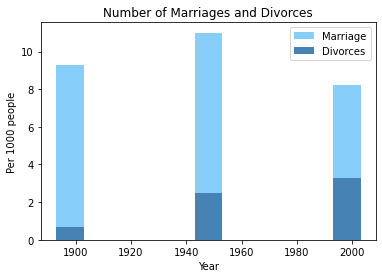

In [184]:
import pandas as pd

us_marriage_divorce_data = pd.read_csv('/users/mausam/downloads/us-marriages-divorces-1867-2014.csv')
us_marriage_divorce_data = us_marriage_divorce_data[
    us_marriage_divorce_data['Year'].apply(lambda x: x in [1900, 1950, 2000])]

years = us_marriage_divorce_data['Year'].values
marriages_per_capita = us_marriage_divorce_data['Marriages_per_1000'].values
divorces_per_capita = us_marriage_divorce_data['Divorces_per_1000'].values
width = 10

plt.bar(years-2, marriages_per_capita, width,label='Marriage',color='lightskyblue')
plt.bar(years-2, divorces_per_capita, width,label='Divorces',color='steelblue')


plt.title('Number of Marriages and Divorces')
plt.legend()
plt.ylabel('Per 1000 people')
plt.xlabel('Year')
plt.show()

# Question 8

-  Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
 the actors by their kill count and label each bar with the corresponding actor's name.
 Don't forget to label your axes!

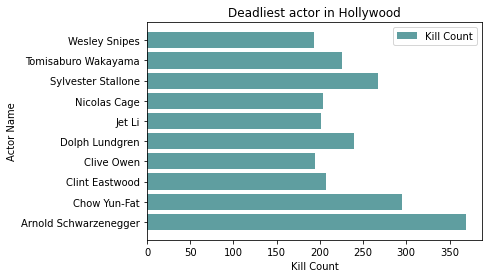

In [170]:
import pandas as pd

data = pd.read_csv('/users/mausam/downloads/actor_kill_counts.csv')
actor = data['Actor'].values
kill = data['Count'].values

plt.barh(actor, kill, color = 'cadetblue', label = "Kill Count")


plt.title('Deadliest actor in Hollywood')
plt.ylabel('Actor Name')
plt.xlabel('Kill Count')
plt.legend()
plt.show()

# Quesstion 9

- Create a pie chart showing the fraction of all Roman Emperors that were assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.


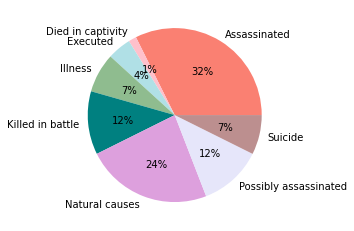

In [194]:
import pandas as pd

piechart = pd.read_csv('/users/mausam/downloads/roman-emperor-reigns.csv')
death = piechart.groupby(['Cause_of_Death'])['Cause_of_Death'].count()
colors = ['salmon', 'pink', 'powderblue', 'darkseagreen','teal','plum','lavender','rosybrown']
plt.pie(death, labels = death.index,autopct= lambda p:'{:.0f}%'.format(round(p)),colors=colors)
plt.show()

# Question 10

- Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.
Don't forget to label your axes! Color each dot according to its year.

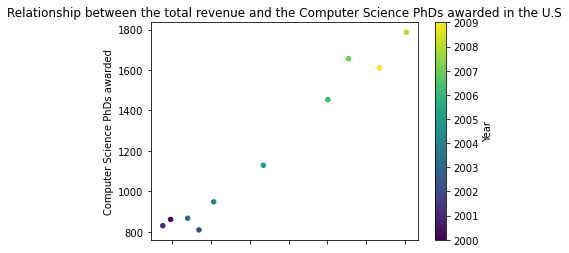

In [195]:
import pandas as pd

data = pd.read_csv('/users/mausam/downloads/arcade-revenue-vs-cs-doctorates.csv')
data.plot.scatter(x='Total Arcade Revenue (billions)', y='Computer Science Doctorates Awarded (US)', c='Year',colormap='viridis');
plt.title('Relationship between the total revenue and the Computer Science PhDs awarded in the U.S')
plt.ylabel('Computer Science PhDs awarded')
plt.xlabel('Total revenue')
plt.show()